## OBJECTIVES:
    1. Determine the five most common journals 
    2. The total articles for each of the five most common journals
    3. Calculate the mean, median, and standard deviation for the open-access cost per article for each journal

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

# Can't decode using UTF-8 so try 'Latin-1' 
wellcome = pd.read_csv('wellcome_apc2013.csv', encoding='Latin-1')

In [2]:
wellcome.head(5)

,PMID/PMCID,Publisher,Journal title,Article title,COST (£) charged to Wellcome (inc VAT when charged)
0,NaN,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,£0.00
1,PMC3679557,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04
2,23043264 PMC3506128,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56
3,23438330 PMC3646402,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,£669.64
4,23438216 PMC3601604,ACS,J Org Chem,Regioselective opening of myo-inositol orthoes...,£685.88


In [3]:
wellcome.describe()

,PMID/PMCID,Publisher,Journal title,Article title,COST (£) charged to Wellcome (inc VAT when charged)
count,1928,2127,2126,2127,2127
unique,1880,299,984,2126,1402
top,-,Elsevier,PLoS One,"Exclusive breastfeeding, diarrhoel morbidity a...",£2040.00
freq,7,387,92,2,94


There is 1 journal title and 199 PMID/PMCIDs missing. Because neither is immutable and the discription file acknowledges that PMID/PMCID is only useful if I need to know if an article is PMC/Europe PMC, which is not necessary in this analysis, I am going to drop that entire column. As for the journal title, I will later attempt at investigating why there is a discrepancy in the actual/expected count. Moreoever, the description file also points out that because there is no name authority control, the same journal can be listed in different ways- I will attempt to standardize those differences as well.

In [4]:
# Drop the PMID/PMCID column
wellcome1 = wellcome.drop(columns='PMID/PMCID', axis=1)
wellcome1.head(2)

,Publisher,Journal title,Article title,COST (£) charged to Wellcome (inc VAT when charged)
0,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,£0.00
1,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04


In [5]:
# Rename colums
wellcome1.rename(columns={'Journal title':'Journal', 'Article title':'Article', 'COST (£) charged to Wellcome (inc VAT when charged)':'Cost'}, inplace=True)

In [6]:
# Drop NANs
wellcome1.dropna()

,Publisher,Journal,Article,Cost
0,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,£0.00
1,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04
2,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56
3,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,£669.64
4,ACS,J Org Chem,Regioselective opening of myo-inositol orthoes...,£685.88
5,ACS,Journal of Medicinal Chemistry,Comparative Structural and Functional Studies ...,£2392.20
6,ACS,Journal of Proteome Research,Mapping Proteolytic Processing in the Secretom...,£2367.95
7,ACS,Mol Pharm,Quantitative silencing of EGFP reporter gene b...,£649.33
8,ACS (Amercian Chemical Society) Publications,ACS Chemical Biology,A Novel Allosteric Inhibitor of the Uridine Di...,£1294.59
9,ACS (Amercian Chemical Society) Publications,ACS Chemical Biology,Chemical proteomic analysis reveals the drugab...,£1294.78


In [7]:
# Remove currency symbols
# Change 'Cost' column back to float
wellcome1['Cost'] = wellcome1['Cost'].str.replace('£','').str.replace('$','').astype(float)
wellcome1.head(3)

,Publisher,Journal,Article,Cost
0,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,0.00
1,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,2381.04
2,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",642.56


In [8]:
# Check data type 
wellcome1.dtypes

Publisher     object
Journal       object
Article       object
Cost         float64
dtype: object

In [9]:
# Removing leading & trailing whitespaces
wellcome1 = wellcome1.apply(lambda x: x.strip() if isinstance(x, str) else x)
wellcome1.head(30)

,Publisher,Journal,Article,Cost
0,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,0.00
1,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,2381.04
2,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",642.56
3,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,669.64
4,ACS,J Org Chem,Regioselective opening of myo-inositol orthoes...,685.88
5,ACS,Journal of Medicinal Chemistry,Comparative Structural and Functional Studies ...,2392.20
6,ACS,Journal of Proteome Research,Mapping Proteolytic Processing in the Secretom...,2367.95
7,ACS,Mol Pharm,Quantitative silencing of EGFP reporter gene b...,649.33
8,ACS (Amercian Chemical Society) Publications,ACS Chemical Biology,A Novel Allosteric Inhibitor of the Uridine Di...,1294.59
9,ACS (Amercian Chemical Society) Publications,ACS Chemical Biology,Chemical proteomic analysis reveals the drugab...,1294.78


In [10]:
# Remove all hyphens, non-alphanumeric characters in string columns
import re
wellcome1.Publisher = wellcome1.Publisher.str.replace(r'[^a-zA-Z0-9]+', ' ').str.strip()
wellcome1.head(20)

,Publisher,Journal,Article,Cost
0,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,0.00
1,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,2381.04
2,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",642.56
3,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,669.64
4,ACS,J Org Chem,Regioselective opening of myo-inositol orthoes...,685.88
5,ACS,Journal of Medicinal Chemistry,Comparative Structural and Functional Studies ...,2392.20
6,ACS,Journal of Proteome Research,Mapping Proteolytic Processing in the Secretom...,2367.95
7,ACS,Mol Pharm,Quantitative silencing of EGFP reporter gene b...,649.33
8,ACS Amercian Chemical Society Publications,ACS Chemical Biology,A Novel Allosteric Inhibitor of the Uridine Di...,1294.59
9,ACS Amercian Chemical Society Publications,ACS Chemical Biology,Chemical proteomic analysis reveals the drugab...,1294.78


In [26]:
# Capitalize all strings in columns so that PlosOne the same as PLOSONE for example
wellcome1.Publisher = wellcome1.Publisher.str.upper()
wellcome1.Journal = wellcome1.Journal.str.upper()
wellcome1.Article = wellcome1.Article.str.upper()

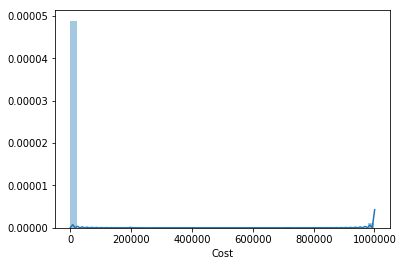

In [14]:
# Take a look at the distribution of cost
ax = sns.distplot(wellcome1.Cost)
plt.show()

In [27]:
wellcome1.sort_values(by=['Cost'], ascending=False)

,Publisher,Journal,Article,Cost
1065,NATURE PUBLISHING GROUP,EMBO REPORTS,PHYSIOLOGICAL RELEASE OF ENDOGENOUS TAU IS STI...,999999.00
1675,SAGE PUBLISHING,QUALITATIVE RESEARCH,PICTURING COMMUTING: PHOTOVOICE AND SEEKING WE...,999999.00
1939,WILEY,HBM JNL HUMAN BRAIN MAPPING,PHASE INFORMED MODEL FOR MOTION AND SUSCEPTIBI...,999999.00
825,ELSEVIER,VETERINARY PARASITOLOGY,PERSISTENCE OF THE EFFICACY OF COPPER OXIDE WI...,999999.00
491,ELSEVIER,CELL,PIRNAS CAN TRIGGER A MULTIGENERATIONAL EPIGENE...,999999.00
1563,PUBLIC LIBRARY OF SCIENCE,PLOS ONE,PLANT SILAC: STABLE-ISOTOPE LABELLING WITH AMI...,999999.00
1947,WILEY,HIPPOCAMPUS,PITUITARY ADENYLATE CYCLASE-ACTIVATING POLYPEP...,999999.00
996,MIT PRESS OPEN ACCESS,THE JOURNAL OF COGNITIVE NEUROSCIENCE,PERCEPTUAL INTEGRATION FOR QUALITATIVELY DIFFE...,999999.00
815,ELSEVIER,TRENDS IN PARASITOLOGY,INFECTION AND TREATMENT IMMUNIZATIONS FOR SUCC...,999999.00
227,BIOMED CENTRAL,BMC GENOMICS.,"PHENOTYPIC, GENOMIC, AND TRANSCRIPTIONAL CHARA...",999999.00


In [28]:
wellcome1.Cost.value_counts()

2040.00      94
999999.00    47
1500.00      37
2400.00      32
2100.00      30
1800.00      28
3000.00      26
1700.00      21
825.68       19
1834.77      18
2034.00      17
852.00       16
1680.00      16
1920.00      13
2010.24      11
3120.00      11
2340.00      11
1620.00      10
1260.00       8
1536.00       8
1704.00       8
1836.92       7
1044.00       7
2145.60       7
2415.37       6
1315.80       6
2377.65       6
2625.60       6
2184.22       6
1939.95       6
             ..
2286.73       1
967.18        1
2381.62       1
1639.06       1
886.30        1
159.74        1
1160.09       1
2381.04       1
572.74        1
1301.25       1
187.03        1
1384.34       1
2232.74       1
1930.88       1
1670.77       1
1758.89       1
1439.45       1
1157.88       1
1889.00       1
750.16        1
614.73        1
2363.76       1
1694.68       1
747.05        1
1577.90       1
1676.06       1
1551.49       1
1809.51       1
1309.50       1
0.00          1
Name: Cost, Length: 1395

### The Five Most Common Journals & Total Articles for Each 

In [63]:
import numpy as np
# make a new dataframe counting unique journals
top_five = wellcome1.groupby('Journal')[['Article']].count().sort_values(by=['Article'], ascending=False)
top_five.columns = ['Total Articles']
top_five.head(5)

,Total Articles
Journal,
PLOS ONE,190
JOURNAL OF BIOLOGICAL CHEMISTRY,53
NEUROIMAGE,29
PLOS GENETICS,24
PLOS PATHOGENS,24


The five most common journals are:

    1. Plos One
    2. Journal of Biological Chemistry
    3. NeuroImage
    4. Plos Pathogens
    5. Plos Genetics
    
Notice that Plos Pathogens and Plos Genetics have the same counts. 

### Calculate the Mean, Median, and Standard Deviation for the Open-Access Cost per Article for Each Journal

In [61]:
# create new dataframe named mean which has the mean values of the cost per journal
mean = wellcome1.groupby('Journal')[['Cost']].mean()
mean.columns = ['Mean']
# join top_five and mean dataframes along the column axis
meanperarticle = pd.concat([mean, top_five], axis=1, sort=False)
meanperarticle.columns = ['Mean', 'Total Articles']
# create a new col and calculate the mean of costs per article
meanperarticle['Mean per Article'] = meanperarticle['Mean']/meanperarticle['Total Articles']
meanperarticle.head()

,Mean,Total Articles,Mean per Article
ACADEMY OF NUTRITION AND DIETETICS,2379.540,1,2379.5400
ACS CHEMICAL BIOLOGY,1418.186,5,283.6372
ACS CHEMICAL NEUROSCIENCE,1186.800,1,1186.8000
ACS NANO,668.140,2,334.0700
"ACTA CRYSTALLOGRAPHICA SECTION D, BIOLOGICAL CRYSTALLOGRAPHY",771.420,1,771.4200


In [64]:
# create new df called median that contains the median values of the costs per journal
median = wellcome1.groupby('Journal')[['Cost']].median()
median.columns = ['Median']
# create new df that joins median df and top_five df
medianperarticle = pd.concat([median, top_five], axis=1, sort=False)
medianperarticle.columns=['Median', 'Total Articles']
# create new col and calculate the median per article
medianperarticle['Median per Article'] = medianperarticle['Median']/medianperarticle['Total Articles']
medianperarticle.head()

,Median,Total Articles,Median per Article
ACADEMY OF NUTRITION AND DIETETICS,2379.54,1,2379.540
ACS CHEMICAL BIOLOGY,1294.59,5,258.918
ACS CHEMICAL NEUROSCIENCE,1186.80,1,1186.800
ACS NANO,668.14,2,334.070
"ACTA CRYSTALLOGRAPHICA SECTION D, BIOLOGICAL CRYSTALLOGRAPHY",771.42,1,771.420


In [66]:
# create a new df called std which calculates the standard deviation of the costs per journal
std = wellcome1.groupby('Journal')[['Cost']].std()
std.column = ['Stdev']
# replace nan by 0
std.fillna(0, inplace=True)
# create new df that join std df and top_five df
stdperarticle = pd.concat([std, top_five], axis=1, sort=False)
stdperarticle.columns = ['Stdev', 'Total Articles']
# calculate std per article
stdperarticle['Stdev per Article'] = stdperarticle['Stdev']/stdperarticle['Total Articles']
stdperarticle.head()

C:\Users\vungu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


,Stdev,Total Articles,Stdev per Article
ACADEMY OF NUTRITION AND DIETETICS,0.000000,1,0.000000
ACS CHEMICAL BIOLOGY,507.309560,5,101.461912
ACS CHEMICAL NEUROSCIENCE,0.000000,1,0.000000
ACS NANO,35.708892,2,17.854446
"ACTA CRYSTALLOGRAPHICA SECTION D, BIOLOGICAL CRYSTALLOGRAPHY",0.000000,1,0.000000
